In [24]:
import numpy as np
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
from z3 import *
from scipy.ndimage import measurements
from IPython.display import Markdown, display,Image,HTML

In [25]:
#Setup the constraints
top_labels  = [41, 8, 0, 0,14, 0,15, 0, 0]
bot_labels  = [ 0, 9, 0,17, 0,15, 0,35, 0]
left_labels = [ 0, 0,25, 0,15, 0,26, 0, 0]
right_labels =[25, 0, 0, 0,10, 0, 0, 0,27]
params = [top_labels,bot_labels,left_labels,right_labels]

In [26]:
def sol_print(solved,matrix):
    fig,ax = plt.subplots(1,1,figsize=(4,4))
    x = np.array((solved*matrix).astype('int').astype('str'))
    x[x=="0"] =""
    ax =sns.heatmap(solved,annot=x,cbar=False,cmap="tab10",fmt="",linewidths=2,linecolor='k',annot_kws={"fontsize":12,"color":"k"},alpha=.6)
    ax.tick_params(left=False, bottom=False,labelleft=False, labelright=True)
    ax.axis("off")
    plt.tight_layout()
    plt.show()

In [27]:
def neigh(x,y,N):
    return [(i+x,j+y) for i,j in [(-1,0),(0,-1),(1,0),(0,1)] if i+x >=0 and i+x <N and j+y >=0 and j+y <N]

def areas(grid):
    labels, num = measurements.label(np.logical_not(grid!=0))
    areas = measurements.sum(np.logical_not(grid!=0), labels, index=range(1, num+1))
    print(areas)
    return np.prod(areas)

def numbers(split,line,hook_line):
    block = 0
    inblock =0
    for n,p in enumerate(split):         
        if p ==1:
            if inblock == 0:
                block += line[n]*hook_line[n]
                inblock = 1
            else:
                block += line[n]*hook_line[n]         
        else:
            if inblock == 1:
                yield block
                block = 0
                inblock = 0                    
    if inblock == 1:
        yield block
            

In [28]:
# Multiline string
multiline_str = """9 9 9 9 9 9 9 9 9 
7 7 7 7 7 7 7 7 9 
6 3 5 5 5 5 8 7 9 
6 3 4 4 4 5 8 7 9 
6 3 2 2 4 5 8 7 9 
6 3 2 1 4 5 8 7 9 
6 3 3 3 3 3 8 7 9 
6 6 6 6 6 6 8 7 9 
8 8 8 8 8 8 8 7 9"""

# Split the string into lines
lines = multiline_str.split('\n')

# Create a list of lists from the lines
data = [[int(num) for num in line.split()] for line in lines]

# Convert the list of lists to a NumPy array
arr = np.array(data)

print(arr)

[[9 9 9 9 9 9 9 9 9]
 [7 7 7 7 7 7 7 7 9]
 [6 3 5 5 5 5 8 7 9]
 [6 3 4 4 4 5 8 7 9]
 [6 3 2 2 4 5 8 7 9]
 [6 3 2 1 4 5 8 7 9]
 [6 3 3 3 3 3 8 7 9]
 [6 6 6 6 6 6 8 7 9]
 [8 8 8 8 8 8 8 7 9]]


In [29]:
boardNums=[[0,18,0,0,0,0,7,0,0],
           [0,0,0,0,12,0,0,0,0],
           [0,0,9,0,0,0,0,31,0],
           [0,0,0,0,0,0,0,0,0],
           [0,5,0,11,0,22,0,22,0],
           [0,0,0,0,0,0,0,0,0],
           [0,9,0,0,0,0,19,0,0],
           [0,0,0,0,14,0,0,0,0],
           [0,0,22,0,0,0,0,15,0]]

In [30]:
numPos=[]
for i in range(0,9):
    for j in range(0,9):
        if(boardNums[i][j]!=0):
            numPos.append([i,j,boardNums[i][j]])

In [31]:
print(numPos)

[[0, 1, 18], [0, 6, 7], [1, 4, 12], [2, 2, 9], [2, 7, 31], [4, 1, 5], [4, 3, 11], [4, 5, 22], [4, 7, 22], [6, 1, 9], [6, 6, 19], [7, 4, 14], [8, 2, 22], [8, 7, 15]]


setup done in 0.84 seconds


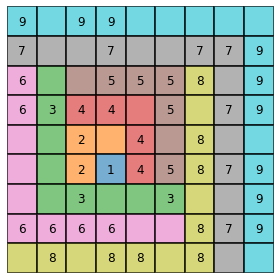

[[9 9 9 9 9 9 9 9 9]
 [7 7 7 7 7 7 7 7 9]
 [6 3 5 5 5 5 8 7 9]
 [6 3 4 4 4 5 8 7 9]
 [6 3 2 2 4 5 8 7 9]
 [6 3 2 1 4 5 8 7 9]
 [6 3 3 3 3 3 8 7 9]
 [6 6 6 6 6 6 8 7 9]
 [8 8 8 8 8 8 8 7 9]]
[[1 0 1 1 0 0 0 0 0]
 [1 0 0 1 0 0 1 1 1]
 [1 0 0 1 1 1 1 0 1]
 [1 1 1 1 0 1 0 1 1]
 [0 0 1 0 1 0 1 0 0]
 [0 0 1 1 1 1 1 1 1]
 [0 0 1 0 0 1 0 0 1]
 [1 1 1 1 0 0 1 1 1]
 [0 1 0 1 1 0 1 0 0]]
[[9 0 9 9 0 0 0 0 0]
 [7 0 0 7 0 0 7 7 9]
 [6 0 0 5 5 5 8 0 9]
 [6 3 4 4 0 5 0 7 9]
 [0 0 2 0 4 0 8 0 0]
 [0 0 2 1 4 5 8 7 9]
 [0 0 3 0 0 3 0 0 9]
 [6 6 6 6 0 0 8 7 9]
 [0 8 0 8 8 0 8 0 0]]
Took 1.2007 seconds
[5. 7. 1. 1. 1. 6. 1. 1. 2. 5. 2. 1. 1. 2.]
solution is 8,400


/tmp/ipykernel_38640/1414098299.py:5: DeprecationWarning: Please use `label` from the `scipy.ndimage` namespace, the `scipy.ndimage.measurements` namespace is deprecated.
  labels, num = measurements.label(np.logical_not(grid!=0))
/tmp/ipykernel_38640/1414098299.py:6: DeprecationWarning: Please use `sum` from the `scipy.ndimage` namespace, the `scipy.ndimage.measurements` namespace is deprecated.
  areas = measurements.sum(np.logical_not(grid!=0), labels, index=range(1, num+1))


In [32]:
start = time.time()
N =9
#set up the solver and variables.
s = Tactic("qffd").solver()
#s = Solver()


H = np.array(IntVector("h",N**2),dtype=object).reshape((N,N))
#H = K(Int,arr.tolist())
for i in range(0,9):
    for j in range(0,9):
        s += (H[i,j] == arr[i,j])

    

# Y = filled    
Y = np.array(IntVector("y",N**2),dtype=object).reshape((N,N))
s += [Or(e==0,e==1) for (i,j),e in np.ndenumerate(Y)]

for n in range(1,N+1):
    s+=PbEq([(And(e==n,Y[i,j]==1),1) for (i,j),e in np.ndenumerate(H)],n)

# no 2x2
s += [Or(Y[i,j] ==0,Y[i+1,j] ==0,Y[i,j+1] ==0,Y[i+1,j+1] ==0) for j in range(N-1) for i in range(N-1)]
    
edge ={}
Z = np.array(IntVector('z', N*N),dtype=object).reshape(N,N)

# create edges and variable to define order in connectivity tree
for i in range(N):
    for j in range(N):  
        for (k,l) in neigh(i,j,N):
            edge[(i,j,k,l)] = Int("e%d%d%d%d" % (i,j,k,l))
            s+=Or(edge[(i,j,k,l)] ==0,edge[(i,j,k,l)] ==1)

# no edges into or out of unfilled cells. Only one edge per cell     
for i in range(N):
    for j in range(N):       
        s += Implies(Y[i,j] ==0 , Sum([edge[(k,l,i,j)] for (k,l) in neigh(i,j,N)]) == 0)
        s += Implies(Y[i,j] ==0 , Sum([edge[(i,j,k,l)] for (k,l) in neigh(i,j,N)]) == 0)
        s += Implies(Y[i,j] > 0 , Sum([edge[(k,l,i,j)] for (k,l) in neigh(i,j,N)]) <= 1)
        for (k,l) in neigh(i,j,N):
            # Make edges one way to form a tree
            s += (edge[(i,j,k,l)] + edge[(k,l,i,j)]) <= 1

    #limit the order values
    s += [And(e>= 0 ,e <=int(N*N)) for (i,j),e in np.ndenumerate(Z)]

    # order is ascending along edges
    for i in range(N):
        for j in range(N):            
            s += [Implies(And(Y[i,j]!=0,edge[(k,l,i,j)]==1),Z[i,j] > Z[k,l]) for (k,l) in neigh(i,j,N)]

    # only one cell with no feed in => root
    s += PbEq([(And(Y[i,j] != 0,Sum([edge[(k,l,i,j)] for (k,l) in neigh(i,j,N) ]) == 0),1) for i in range(N) for j in range(N)],1)

AR = H * Y


for i in range(0,len(numPos)):
    row, col, value = numPos[i]
    left = AR[row, col - 1] if col > 0 else 0
    right = AR[row, col + 1] if col < 8 else 0
    top = AR[row - 1, col] if row > 0 else 0
    bottom = AR[row + 1, col] if row < 8 else 0
    center = AR[row, col]
    s += (left + right + top + bottom == value)
    s += (center == 0)

print("setup done in {:.2f} seconds".format(time.time()-start))       
if s.check() == sat:
    m = s.model()
    evalu = np.vectorize(lambda x:m.evaluate(x).as_long())
    result_x =  evalu(H)
    result_y =  evalu(Y)
    sol_print(result_x,result_y)
    print(result_x)
    print(result_y)
    print(result_x*result_y)
    print("Took {:.4f} seconds".format(time.time()- start))
    soln = result_x*result_y
    print("solution is {:,.0f}".format(areas(soln)))
else:
    print("Fail")
    print(s.check())